## Dataset Description

### Etiquetas

El conjunto de datos se proporciona en formato CSV (train.csv) y contiene información sobre 732 pacientes con diferentes grados de enfermedad (1-4) o ausencia de la misma (0). Este dato puede obtenerse de la columna 'label'.

## Características

Además, el conjunto de datos está compuesto por 13 características adicionales que describen las condiciones de salud de cada uno de los pacientes. Estas características se describen a continuación:

1. **age**: Edad del paciente.
2. **sex**: Sexo del paciente.
3. **cp**: Tipo de dolor de pecho:
   - 1: Angina típica
   - 2: Angina atípica
   - 3: Dolor no-anginoso
   - 4: Asintomático
4. **trestbps**: Presión arterial en reposo (en mm Hg al ingreso en el hospital).
5. **chol**: Colesterol sérico en mg/dl.
6. **fbs**: Dolor provocado por el esfuerzo (1 = sí; 0 = no).
7. **restecg**: Resultados electrocardiográficos en reposo:
   - 0: Normal
   - 1: Presenta anormalidad de la onda ST-T
   - 2: Presenta probable o definida hipertrofía ventricular izquierda
8. **thalach**: Frecuencia cardiaca en reposo.
9. **exang**: Angina inducida por el ejercicio (1 = sí; 0 = no).
10. **oldpeak**: Depresión del ST inducida por el ejercicio en relación con el reposo.
11. **slope**: La pendiente del segmento ST en ejercicio máximo:
    - 1: Pendiente ascendente
    - 2: Plano
    - 3: Pendiente descendente
12. **ca**: Número de vasos mayores (0-3) coloreados por fluoroscopía.
13. **thal**:
    - 3: Normal
    - 6: Defecto fijo
    - 7: Defecto reversible


## 1- Analisis exploratorio

Analisis descriptivo del dataset de entrenamiento (TRAIN)

In [85]:
import pandas as pd
X_train = pd.read_csv("train.csv")
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,51.0,1.0,1.0,125.0,213.0,0.0,2.0,125.0,1.0,1.4,1.0,1.0,3.0,0
1,54.0,1.0,3.0,120.0,237.0,0.0,0.0,150.0,1.0,1.5,-9.0,-9.0,7.0,2
2,63.0,1.0,4.0,140,0,?,2.0,149,0,2,1,?,?,2
3,52.0,0.0,2.0,140.0,-9.0,0.0,0.0,140.0,0.0,0.0,-9.0,-9.0,-9.0,0
4,55.0,1.0,4.0,140.0,217.0,0.0,0.0,111.0,1.0,5.6,3.0,0.0,7.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,46.0,1.0,3.0,120.0,230.0,0.0,0.0,150.0,0.0,0.0,-9.0,-9.0,-9.0,0
728,62.0,1.0,3.0,?,204,0,1.0,?,?,?,?,?,?,1
729,43.0,0.0,3.0,122.0,213.0,0.0,0.0,165.0,0.0,0.2,2.0,0.0,3.0,0
730,68.0,1.0,3.0,150,195,1,0.0,132,0,0,?,?,6,1


In [86]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       732 non-null    float64
 1   sex       732 non-null    float64
 2   cp        732 non-null    float64
 3   trestbps  732 non-null    object 
 4   chol      732 non-null    object 
 5   fbs       732 non-null    object 
 6   restecg   732 non-null    float64
 7   thalach   732 non-null    object 
 8   exang     732 non-null    object 
 9   oldpeak   732 non-null    object 
 10  slope     732 non-null    object 
 11  ca        732 non-null    object 
 12  thal      732 non-null    object 
 13  label     732 non-null    int64  
dtypes: float64(4), int64(1), object(9)
memory usage: 80.2+ KB


In [24]:
X_train.describe()

,age,sex,cp,restecg,label
count,732.000000,732.000000,732.000000,732.000000,732.000000
mean,53.364754,0.789617,3.250000,0.602459,1.132514
std,9.306868,0.407859,0.923363,0.802966,1.257615
min,28.000000,0.000000,1.000000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,0.000000,0.000000
50%,54.000000,1.000000,4.000000,0.000000,1.000000
75%,60.000000,1.000000,4.000000,1.000000,2.000000
max,76.000000,1.000000,4.000000,2.000000,4.000000


In [41]:
# Contar la cantidad de filas con valores faltantes
missing_values_count = X_train[X_train == '?'].count()

# Ordenar los valores de mayor a menor
missing_values_count_sorted = missing_values_count.sort_values(ascending=False)

# Mostrar el conteo de valores faltantes por característica ordenados
print("Valores faltantes por característica:")
print(missing_values_count_sorted)

# Calcular el porcentaje de valores faltantes por característica
missing_percentage = (missing_values_count_sorted / len(X_train)) * 100

# Mostrar el porcentaje de valores faltantes por característica
print("\nPorcentaje de valores faltantes por característica:")
print(missing_percentage)

Valores faltantes por característica:
ca          249
thal        169
slope        95
fbs          58
oldpeak      49
trestbps     47
thalach      44
exang        44
chol          5
age           0
sex           0
cp            0
restecg       0
label         0
dtype: int64

Porcentaje de valores faltantes por característica:
ca          34.016393
thal        23.087432
slope       12.978142
fbs          7.923497
oldpeak      6.693989
trestbps     6.420765
thalach      6.010929
exang        6.010929
chol         0.683060
age          0.000000
sex          0.000000
cp           0.000000
restecg      0.000000
label        0.000000
dtype: float64


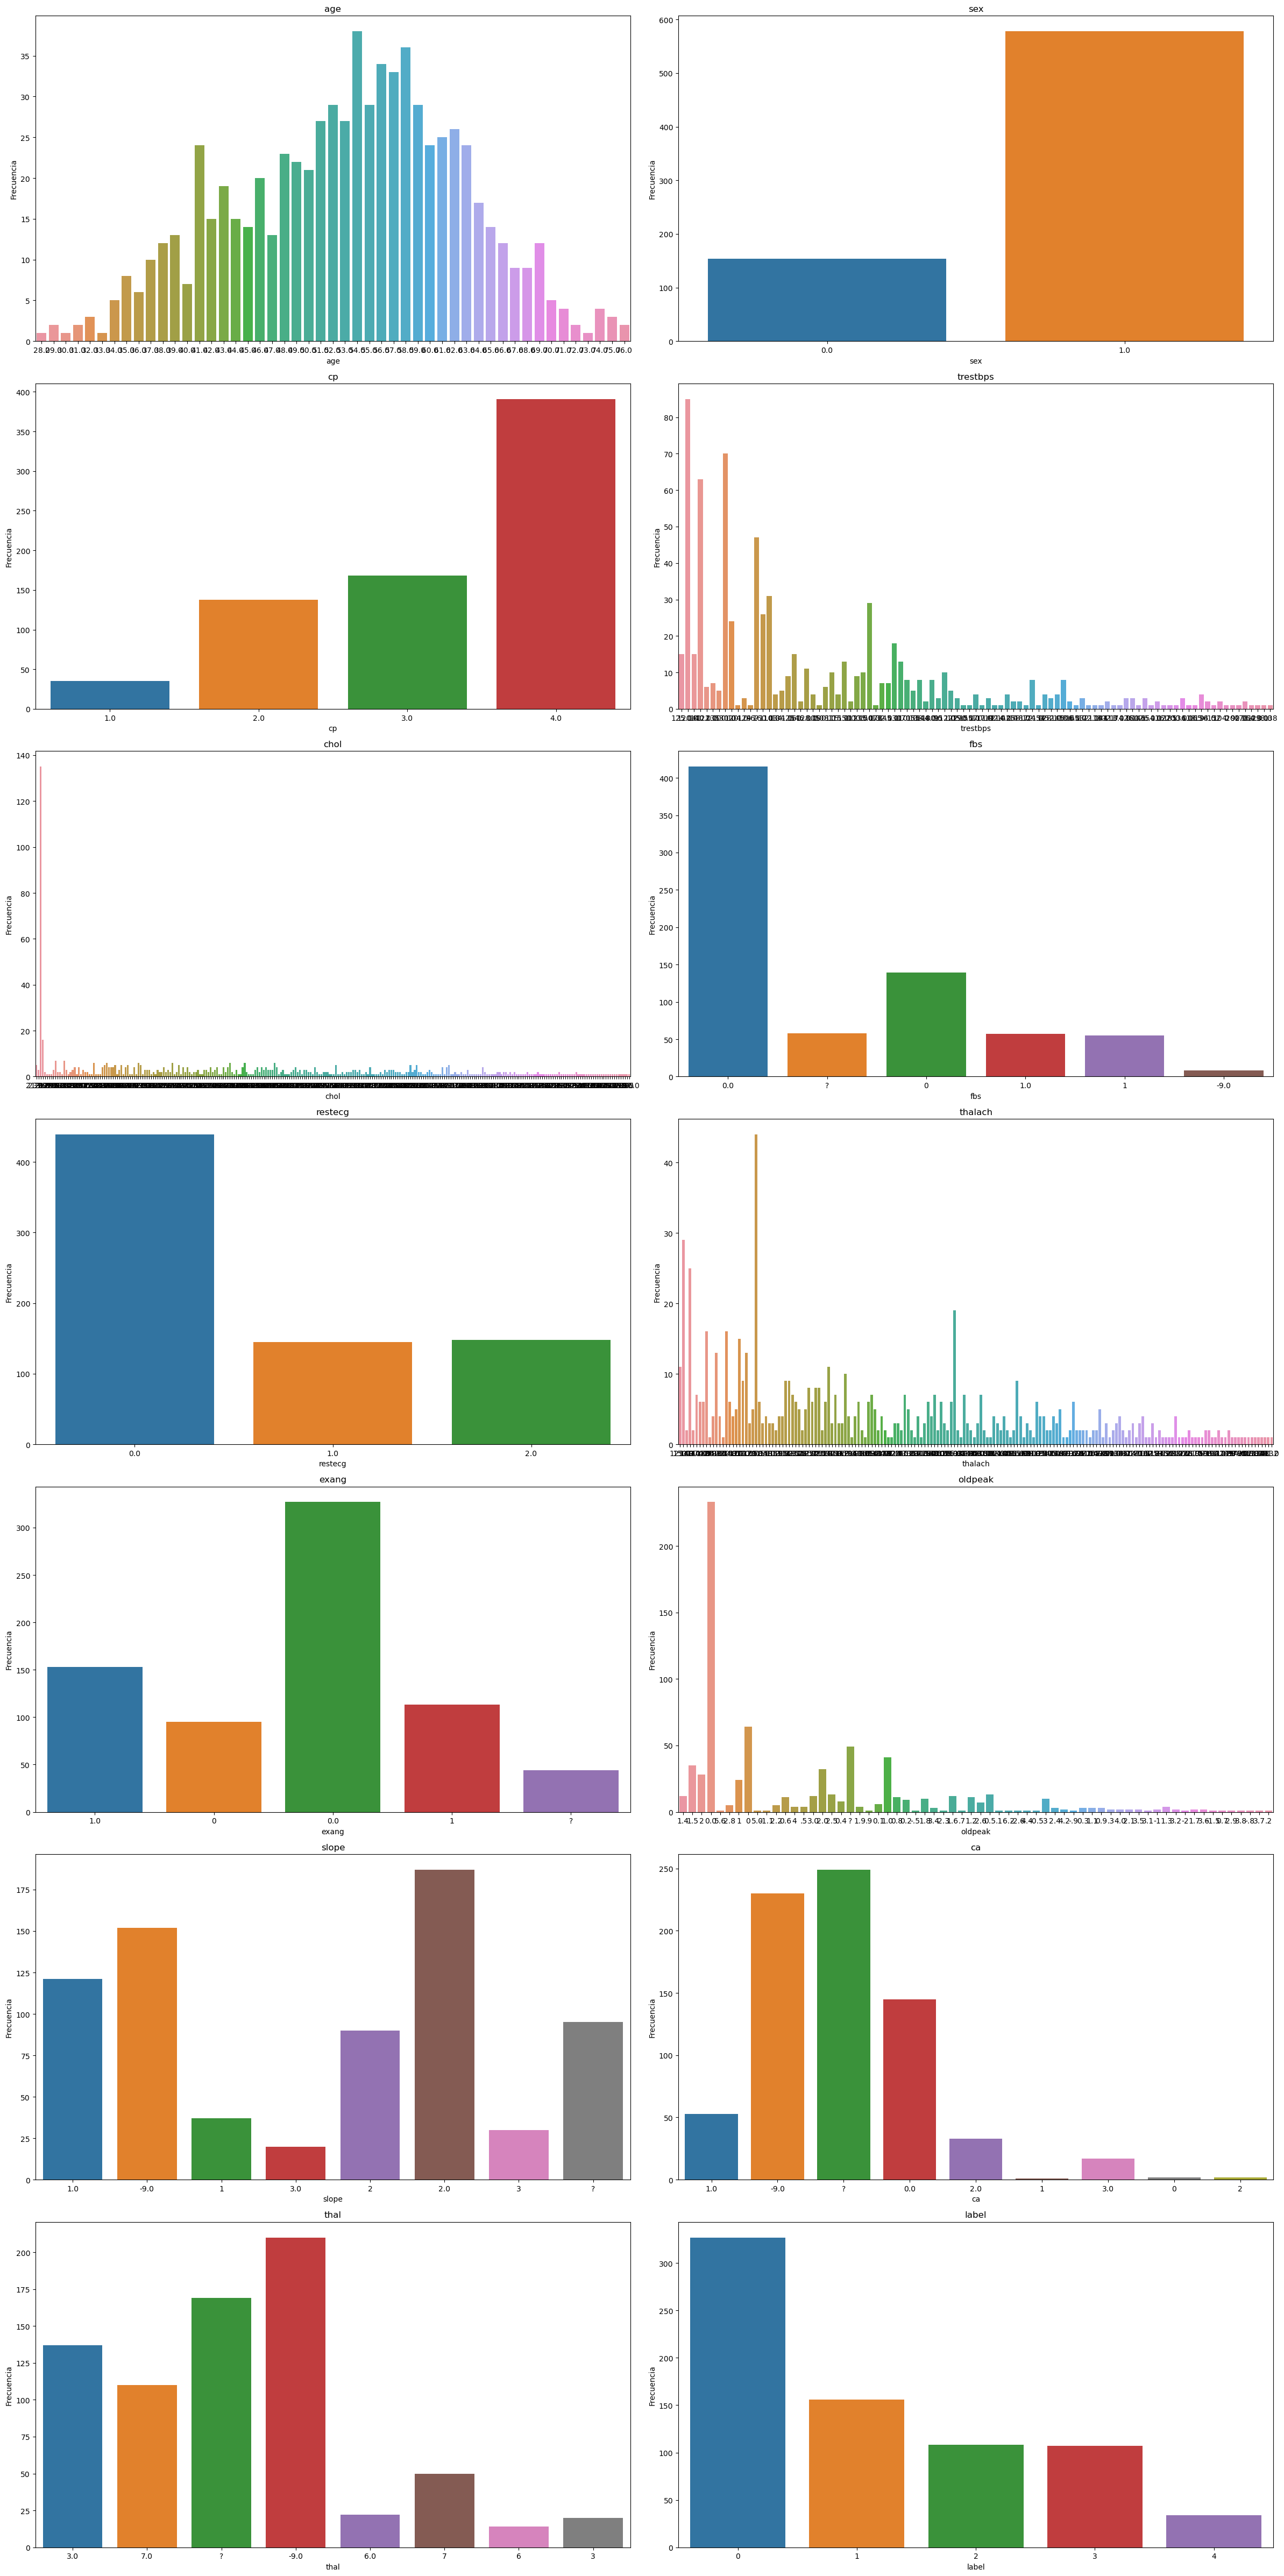

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'label']

# Subgráficos
num_cols = 2
num_rows = int(np.ceil(len(cols) / num_cols))

# Crear subplots para cada variable 
plt.figure(figsize=(24, 48))
for i, col in enumerate(cols, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(data=df, x=col)
    plt.title(f"{col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()


## 2 -Tratamiendo del dataset

Definicion de datatypes

In [130]:
X_train = pd.read_csv("train.csv")

In [131]:
# Convertir variables a int
int_cols = ['age',
            'label']
X_train[int_cols] = X_train[int_cols].astype('int64')

# Convertir variables a float
float_cols = ['trestbps', 
                'chol',
                'thalach', 
                'oldpeak',
                'ca']

X_train[float_cols] = X_train[float_cols].apply(pd.to_numeric, errors='coerce')

# Convertir variables a cat
categorical_cols = ['restecg', 
                    'slope',
                    'fbs', 
                    'thal',
                    'exang',
                    'cp',
                    'sex']

X_train[categorical_cols] = X_train[categorical_cols].astype('category')

# Reemplazar '?' con NaN en las  cat
X_train[categorical_cols] = X_train[categorical_cols].replace('?', np.nan)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       732 non-null    int64   
 1   sex       732 non-null    category
 2   cp        732 non-null    category
 3   trestbps  685 non-null    float64 
 4   chol      727 non-null    float64 
 5   fbs       674 non-null    category
 6   restecg   732 non-null    category
 7   thalach   688 non-null    float64 
 8   exang     688 non-null    category
 9   oldpeak   683 non-null    float64 
 10  slope     637 non-null    category
 11  ca        483 non-null    float64 
 12  thal      563 non-null    category
 13  label     732 non-null    int64   
dtypes: category(7), float64(5), int64(2)
memory usage: 46.7 KB


Reemplazo de ***valores faltantes NaN*** por la media en las variables float e int, y por la moda en las variables cat


In [132]:
# Iterar sobre las columnas categóricas y reemplazar los NaN con el valor más frecuente
for col in categorical_cols:
    X_train[col].fillna(X_train[col].mode()[0], inplace=True)


# Iterar sobre las columnas categóricas y reemplazar los NaN con la media
for col in float_cols:
    X_train[col].fillna(X_train[col].mean(), inplace=True)

In [133]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,51,1.0,1.0,125.000000,213.0,0.0,2.0,125.000000,1.0,1.400000,1.0,1.000000,3.0,0
1,54,1.0,3.0,120.000000,237.0,0.0,0.0,150.000000,1.0,1.500000,-9.0,-9.000000,7.0,2
2,63,1.0,4.0,140.000000,0.0,0.0,2.0,149.000000,0,2.000000,1,-3.923395,-9.0,2
3,52,0.0,2.0,140.000000,-9.0,0.0,0.0,140.000000,0.0,0.000000,-9.0,-9.000000,-9.0,0
4,55,1.0,4.0,140.000000,217.0,0.0,0.0,111.000000,1.0,5.600000,3.0,0.000000,7.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,46,1.0,3.0,120.000000,230.0,0.0,0.0,150.000000,0.0,0.000000,-9.0,-9.000000,-9.0,0
728,62,1.0,3.0,131.975182,204.0,0,1.0,138.132267,0.0,0.881259,2.0,-3.923395,-9.0,1
729,43,0.0,3.0,122.000000,213.0,0.0,0.0,165.000000,0.0,0.200000,2.0,0.000000,3.0,0
730,68,1.0,3.0,150.000000,195.0,1,0.0,132.000000,0,0.000000,2.0,-3.923395,6,1


Comprobacion de ausencia de valores nulos e integridad del dataset

In [134]:
X_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       732 non-null    int64   
 1   sex       732 non-null    category
 2   cp        732 non-null    category
 3   trestbps  732 non-null    float64 
 4   chol      732 non-null    float64 
 5   fbs       732 non-null    category
 6   restecg   732 non-null    category
 7   thalach   732 non-null    float64 
 8   exang     732 non-null    category
 9   oldpeak   732 non-null    float64 
 10  slope     732 non-null    category
 11  ca        732 non-null    float64 
 12  thal      732 non-null    category
 13  label     732 non-null    int64   
dtypes: category(7), float64(5), int64(2)
memory usage: 46.7 KB
